# Applied Data Science Project 1:



Jimmy Smiley
Cognitive Disonance Voter Trends:

The aim of this project is to look into the trends associated with voters who show cognitive dissonance. The data that will be considered is from American National Election Studies(ANES). There were two forms for this survey form 1(1498 surveys) and form 2(1582 surveys). More specifically the data is from the 2020 exploratory testing survey. More info about the survey will be in the data folder. The first step in this analysis is to describe the qualifications for cognitive dissonance and to make a global definition.

Cognitive dissonance is defined as the state of having inconsistent thoughts, beliefs, or attitudes, especially as relating to behavioral decisions and attitude change. This is according to google dictionary. This will be our working definition. In terms of our survey, being in this state of inconsistency will shine through certain questions and answers. The scope of this project will explore three paired questions on the survey.


# Pair One:

The first pair of questions on the survey that will be analyzed are below. These questions were only on form one which had 1498 responses.


1.) (antirelig1) There are always some people whose ideas are considered bad or dangerous by other people. For instance, somebody who is against all church and religion. If such a person wanted to make a speech in your community against churches and religion, should he or she be allowed to speak or not?

The two answers were

    1. Allowed to speak
    2. Not Allowed to speak
    
2.) (moralcert3)  How well do the following statements fit with your own views? Diversity of opinion is valuable in any group or organization.

The answers were

    1. Not well at all
    2. Slighty well
    3. Moderately well
    4. Very well
    5. Extremely well
    
The answers that are very contradictory are "Not allowed to speak" and "Extremely well". The opposite contradictory answers; "Allowed to speak" and "Not well at all" aren't as strong with the wording. Becuase of this only the first set of contradictory answers will be analyzed. 

In our analysis we will look at mainly demographics of the people who were contradictory. This will include party, age, education level, and sex. 
 

In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("anes_pilot_2020ets_csv.csv")

From our data we need a list of every qualifyer that will be examined.

In [401]:
sex=data["sex"]
age=data["birthyr"]
educ=data["educ"]
party=data["pid1r"]
stress1=data["stress1"]
stress4=data["stress4"]
moralcert=data["moralcert3"]
relig=data["antirelig1"]
speech=data["speech1"]
callout=data["callout2"]
check=data["check"]
serious=data["serious"]

sex_2=pd.DataFrame(sex, columns = ['sex']) #put data into dataframe
age_2=pd.DataFrame(age, columns = ['birthyr'])
educ_2=pd.DataFrame(educ, columns = ['educ'])
party_2=pd.DataFrame(party, columns = ['pid1r'])
stress1_2=pd.DataFrame(stress1, columns = ['stress1'])
stress4_2=pd.DataFrame(stress4, columns = ['stress4'])
moralcert_2=pd.DataFrame(moralcert, columns = ['moralcert3'])
relig_2=pd.DataFrame(relig, columns = ['antirelig1'])
speech_2=pd.DataFrame(speech,columns = ['speech1'])
callout_2=pd.DataFrame(callout, columns= ['callout2'])
check_2=pd.DataFrame(check, columns = ['check'])
serious_2=pd.DataFrame(serious, columns = ['serious'])

sex_3=sex_2.fillna(value=np.nan) #get rid of all Nonetype objects for iteration
age_3=age_2.fillna(value=np.nan)
educ_3=educ_2.fillna(value=np.nan)
party_3=party_2.fillna(value=np.nan)
stress1_3=stress1_2.fillna(value=np.nan)
stress4_3=stress4_2.fillna(value=np.nan)
moralcert_3=moralcert_2.fillna(value=np.nan)
relig_3=relig_2.fillna(value=np.nan)
speech_3=speech_2.fillna(value=np.nan)
callout_3=callout_2.fillna(value=np.nan)
check_3=check_2.fillna(value=np.nan)
serious_3=serious_2.fillna(value=np.nan)


sex_list=sex_3['sex'].tolist() # turn data frame columns into lists ready to iterate over
age_list=age_3['birthyr'].tolist()
educ_list=educ_3['educ'].tolist()
party_list=party_3['pid1r'].tolist()
stress1_list=stress1_3['stress1'].tolist()
stress4_list=stress4_3['stress4'].tolist()
moral_list=moralcert_3['moralcert3'].tolist()
relig_list=relig_3['antirelig1'].tolist()
speech_list=speech_3['speech1'].tolist()
callout_list=callout_3['callout2'].tolist()
check_list=check_3['check'].tolist()
serious_list=serious_3['serious'].tolist()

educate_quals=['no HS degree','HS degree', 'College Dropout', 'Associates Degree', 'Bachelors Degree','Masters Degree','Professional Degree','Doctorate Degree']
partie_quals=['Rep','Dem','Ind','Oth']


In [402]:
def Listalyze(list1,list2,ans1,ans2,age,sex,educ,stress1,stress2,party):
    total=len(list1)
    totalcount=0
    df=pd.DataFrame(columns=["age",'sex','education','stress1','stress2','party'])
    columns=list(df)
    data1=[]
    for i in range (total):
        if list1[i]==ans1:
            if list2[i]==ans2:
                totalcount+=1
                values = [2020-age[i],sex[i],educ[i],stress1[i],stress2[i],party[i]]
                zipped = zip(columns, values)
                a_dictionary = dict(zipped)
                data1.append(a_dictionary)
            else:
                totalcount=totalcount
        else:
            totalcount=totalcount
    df = df.append(data1, True)
    print("The total amount of people whose answers are contradictory is", totalcount)
    return df

def Listalyze2(list1,list2,ans1,ans2,age,sex,educ,stress1,stress2,party):
    total=len(list1)
    totalcount=0
    stresscount=0
    df=pd.DataFrame(columns=["age",'sex','education','stress1','stress2','party'])
    columns=list(df)
    data1=[]
    for i in range (total):
        if list1[i]==ans1:
            if list2[i]!=ans2:
                totalcount+=1
                values = [2020-age[i],sex[i],educ[i],stress1[i],stress2[i],party[i]]
                zipped = zip(columns, values)
                a_dictionary = dict(zipped)
                data1.append(a_dictionary)
                if stress1[i]<7:
                    stresscount+=1
                else:
                    stresscount=stresscount
            else:
                totalcount=totalcount
        else:
            totalcount=totalcount
    df = df.append(data1, True)
    print("The total amount of people whose answers are contradictory is", totalcount)
    print("The total number of people who filled out form 1 is", totalcount-stresscount)
    return df

def sex(list):
    nlist=[]
    for i in range (len(list)):
        if list[i]==1:
            nlist.append('Male')
        else:
            nlist.append('Female')
    return nlist

def educate(list):
    nh=0
    h=0
    cd=0
    a=0
    b=0
    m=0
    p=0
    d=0
    for i in range (len(list)):
        if list[i]==1:
            nh+=1
        elif list[i]==2:
            h+=1
        elif list[i]==3:
            cd+=1
        elif list[i]==4:
            a+=1
        elif list[i]==5:
            b+=1
        elif list[i]==6:
            m+=1
        elif list[i]==7:
            p+=1
        else:
            d+=1
    return [nh,h,cd,a,b,m,p,d]

def partie(list):
    r=0
    d=0
    ind=0
    o=0
    for i in range (len(list)):
        if list[i]== 1:
            r+=1
        elif list[i]==2:
            d+=1
        elif list[i]==3:
            ind+=1
        else:
            o+=1
    return [r,d,ind,o]
        

In [403]:
usefuldata=Listalyze(moral_list,relig_list,5,2,age_list,sex_list,educ_list,stress1_list,stress4_list,party_list)

The total amount of people whose answers are contradictory is 79


In [404]:
p1sex=sex(usefuldata['sex'].tolist())
p1age=usefuldata['age'].tolist()
p1educ=educate(usefuldata['education'].tolist())
p1party=partie(usefuldata['party'].tolist())

m1=0
f1=0

for i in range (len(p1sex)):
    if p1sex[i]=='Male':
        m1+=1
    else:
        f1+=1
sex1=[m1,f1]

        

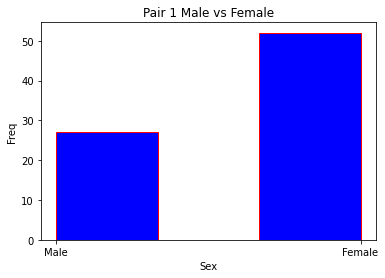

In [405]:
plt.hist(p1sex, bins=3, align='mid', color='b', edgecolor='red',
              linewidth=1)
 
# Add axis labels
plt.xlabel("Sex")
plt.ylabel("Freq")
plt.title("Pair 1 Male vs Female")
plt.savefig('p1sex.png', dpi=300, bbox_inches='tight')
 
plt.show()

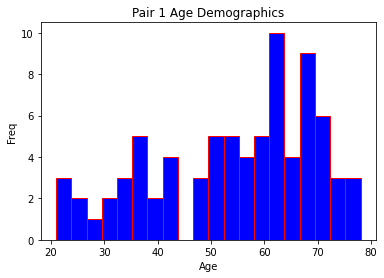

In [406]:
plt.hist(p1age, bins=20, align='mid', color='b', edgecolor='red',
              linewidth=1)
 
# Add axis labels
plt.xlabel("Age")
plt.ylabel("Freq")
plt.title("Pair 1 Age Demographics")
plt.savefig('p1age.png', dpi=300, bbox_inches='tight')
 
plt.show()

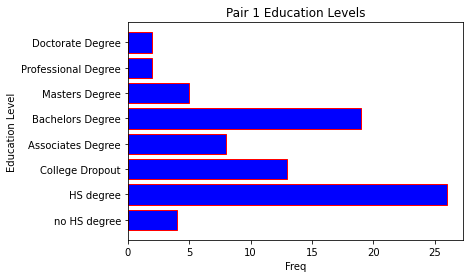

In [407]:
plt.barh(educate_quals, p1educ ,color='b', edgecolor = 'red')
# This is the location for the annotated text

# Giving the tilte for the plot
plt.title("Pair 1 Education Levels")
# Namimg the x and y axis
plt.ylabel('Education Level')
plt.xlabel('Freq')
plt.savefig('p1educ.png', dpi=300, bbox_inches='tight')
# Displaying the bar plot
plt.show()

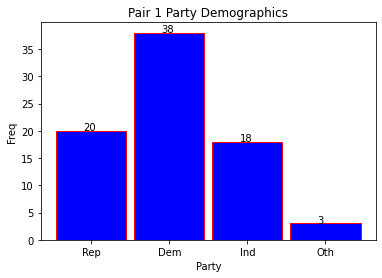

In [408]:
plt.bar(partie_quals, p1party, width= 0.9, align='center',color='b', edgecolor = 'red')
# This is the location for the annotated text
i = 1.0
j = 2000
# Annotating the bar plot with the values (total death count)
for i in range(len(partie_quals)):
    plt.annotate(p1party[i], (-0.1 + i, p1party[i] +.1))
# Giving the tilte for the plot
plt.title("Pair 1 Party Demographics")
# Namimg the x and y axis
plt.xlabel('Party')
plt.ylabel('Freq')
plt.savefig('p1party.png', dpi=300, bbox_inches='tight')

# Displaying the bar plot
plt.show()

# Pair Two:

The second pair of questions on the survey that will be analyzed are below. These questions only appeared in form 1 so only 1498 people answered. 


1.) (callout2) When a person unintentionally behaves in a way that is hurtful or that discriminates against others,
 how important is it for people to point out and publicly criticize this behavior?
 
 The answers were
 
    1. Extremely important 
    2. Very important
    3. Moderately important
    4. A little important
    5. Not at all important
    
2.)  (speech1) Some complain that too many people are easily offended these days and too quick to police what
 others say. They refer to this as “political correctness.” In your view, how serious of a problem is political
 correctness?

The answers were

    1. Extremely serious 
    2. Very serious
    3. Moderately serious
    4. A little serious
    5. Not at all serious
    
The answers that are very contradictory are "Extremely Important" and "Extremely serious". The opposite contradictory answers aren't as strong with the wording. Becuase of this only the first set of contradictory answers will be analyzed. 

In our analysis we will look at mainly demographics of the people who were contradictory. This will include party, age, education level, and sex. 

In [409]:
usefuldata2=Listalyze(speech_list,callout_list,1,1,age_list,sex_list,educ_list,stress1_list,stress4_list,party_list)

The total amount of people whose answers are contradictory is 107


In [410]:
p2sex=sex(usefuldata2['sex'].tolist())
p2age=usefuldata2['age'].tolist()
p2educ=educate(usefuldata2['education'].tolist())
p2party=partie(usefuldata2['party'].tolist())

m2=0
f2=0

for i in range (len(p2sex)):
    if p2sex[i]=='Male':
        m2+=1
    else:
        f2+=1
sex2=[m2,f2]



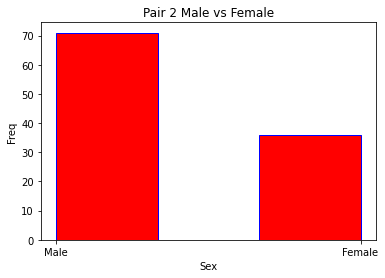

In [428]:
plt.hist(p2sex, bins=3, align='mid', color='r', edgecolor='b',
              linewidth=1)

# Add axis labels
plt.xlabel("Sex")
plt.ylabel("Freq")
plt.title("Pair 2 Male vs Female")
plt.savefig('p2sex.png', dpi=300, bbox_inches='tight')
 
plt.show()

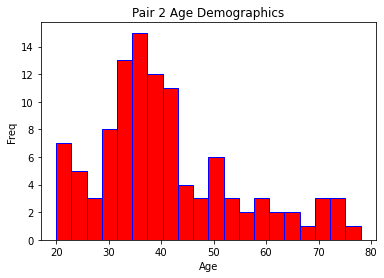

In [429]:
plt.hist(p2age, bins=20, align='mid', color='r', edgecolor='b',
              linewidth=1)
 
# Add axis labels
plt.xlabel("Age")
plt.ylabel("Freq")
plt.title("Pair 2 Age Demographics")
plt.savefig('p2age.png', dpi=300, bbox_inches='tight')
 
plt.show()

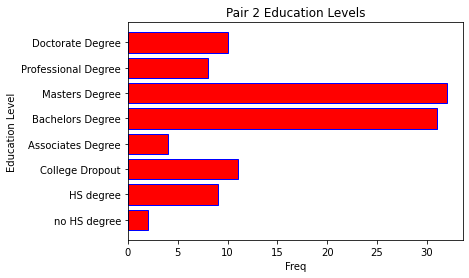

In [413]:
plt.barh(educate_quals, p2educ ,color='r', edgecolor = 'b')
# This is the location for the annotated text

# Giving the tilte for the plot
plt.title("Pair 2 Education Levels")
# Namimg the x and y axis
plt.ylabel('Education Level')
plt.xlabel('Freq')
plt.savefig('p2educ.png', dpi=300, bbox_inches='tight')
# Displaying the bar plot
plt.show()

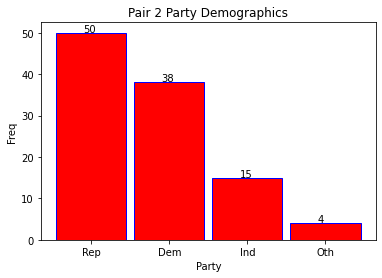

In [414]:
plt.bar(partie_quals, p2party, width= 0.9, align='center',color='r', edgecolor = 'b')
# This is the location for the annotated text
i = 1.0
j = 2000
# Annotating the bar plot with the values (total death count)
for i in range(len(partie_quals)):
    plt.annotate(p2party[i], (-0.1 + i, p2party[i] +.2))
# Giving the tilte for the plot
plt.title("Pair 2 Party Demographics")
# Namimg the x and y axis
plt.xlabel('Party')
plt.ylabel('Freq')
plt.savefig('p2party.png', dpi=300, bbox_inches='tight')

# Displaying the bar plot
plt.show()

# Pair Three:

The third pair of questions on the survey that will be analyzed are below. These questions appeared on both forms. This is the most direct contradicting questions there were on the survey. On page 9 of the survey there is a check question. If someone didn't answer this question properly then they weren't paying attention. 


1.) (check) To help us be sure your device is working properly with ours, please select “slightly disagree” below.
 
 The answers were
 
    1. Strongly agree
    2. Moderately agree
    3. Slightly agree
    4. Neither agree nor disagree 
    5. Slightly disagree
    6. Moderately disagree
    7. Strongly disagree
    
2.)  (serious) We sometimes find people don't always take surveys seriously, instead providing funny or
insincere answers. How often did you give a serious response to the questions on the survey?

The answers were

    1. Never Serious
    2. Serious some of the time
    3. Serious half of the time
    4. Serious most of the time
    5. Always serious
    
The answers that are very contradictory are "Always serious" and one of the wrong answersto the check question. If someone answered the check question wrong then they weren't always serious. It is very easy to see the contradiction here. 

In our analysis we will look at mainly demographics of the people who were contradictory. This will include party, age, education level, sex, and stress levels(if form 2). 

In [415]:
usefuldata3=Listalyze2(serious_list,check_list,5,5,age_list,sex_list,educ_list,stress1_list,stress4_list,party_list)

The total amount of people whose answers are contradictory is 205
The total number of people who filled out form 1 is 93


In [416]:
p3sex=sex(usefuldata3['sex'].tolist())
p3age=usefuldata3['age'].tolist()
p3educ=educate(usefuldata3['education'].tolist())
p3party=partie(usefuldata3['party'].tolist())


m3=0
f3=0

for i in range (len(p3sex)):
    if p3sex[i]=='Male':
        m3+=1
    else:
        f3+=1
sex3=[m3,f3]

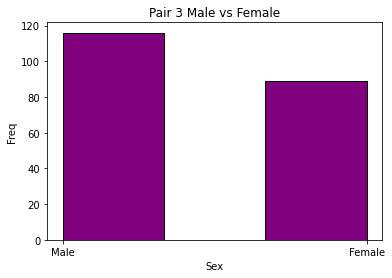

In [417]:
plt.hist(p3sex, bins=3, align='mid', color='Purple',edgecolor='black',
              linewidth=1)
 
# Add axis labels
plt.xlabel("Sex")
plt.ylabel("Freq")
plt.title("Pair 3 Male vs Female")
plt.savefig('p3sex.png', dpi=300, bbox_inches='tight')
 
plt.show()

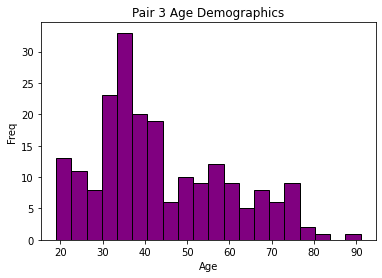

In [418]:
plt.hist(p3age, bins=20, align='mid', color='purple',edgecolor='black',
              linewidth=1)
 
# Add axis labels
plt.xlabel("Age")
plt.ylabel("Freq")
plt.title("Pair 3 Age Demographics")
plt.savefig('p3age.png', dpi=300, bbox_inches='tight')
 
plt.show()

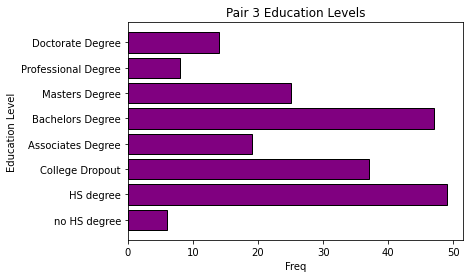

In [419]:
plt.barh(educate_quals, p3educ ,color='purple', edgecolor = 'black')
# This is the location for the annotated text

# Giving the tilte for the plot
plt.title("Pair 3 Education Levels")
# Namimg the x and y axis
plt.ylabel('Education Level')
plt.xlabel('Freq')
plt.savefig('p3educ.png', dpi=300, bbox_inches='tight')
# Displaying the bar plot
plt.show()

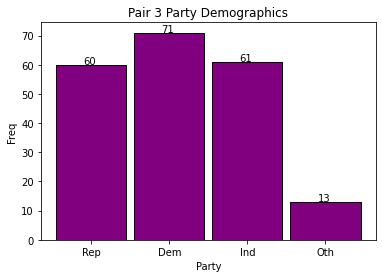

In [420]:
plt.bar(partie_quals, p3party, width= 0.9, align='center',color='purple', edgecolor = 'black')
# This is the location for the annotated text
i = 1.0
j = 2000
# Annotating the bar plot with the values (total death count)
for i in range(len(partie_quals)):
    plt.annotate(p3party[i], (-0.1 + i, p3party[i] +.2))
# Giving the tilte for the plot
plt.title("Pair 3 Party Demographics")
# Namimg the x and y axis
plt.xlabel('Party')
plt.ylabel('Freq')
plt.savefig('p3party.png', dpi=300, bbox_inches='tight')

# Displaying the bar plot
plt.show()

# Conclusion

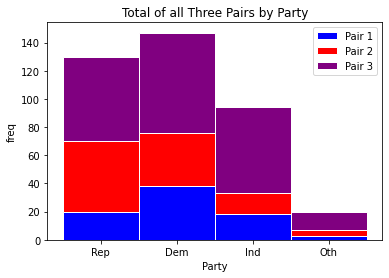

In [421]:

#Heights of bars1 + bars2
bars = np.add(p1party, p2party).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3]
 
# Names of group and bar width
barWidth = 1
 
# Create brown bars
plt.bar(r, p1party, color='b', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, p2party, bottom=p1party, color='r', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, p3party, bottom=bars, color='purple', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, partie_quals)
plt.xlabel("Party")
plt.title('Total of all Three Pairs by Party')
plt.ylabel("freq")
plt.legend(['Pair 1','Pair 2','Pair 3'],loc=1)
plt.savefig('totalparty.png', dpi=300, bbox_inches='tight')
 
# Show graphic
plt.show()


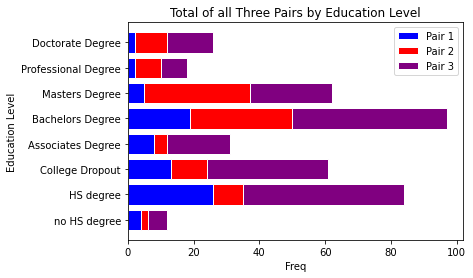

In [422]:
#Heights of bars1 + bars2
bars = np.add(p1educ, p2educ).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7]
 
# Names of group and bar width
barWidth = 1
 
# Create brown bars
plt.barh(r, p1educ, color='b', edgecolor='white')
# Create green bars (middle), on top of the firs ones
plt.barh(r, p2educ, left=p1educ, color='r', edgecolor='white')
# Create green bars (top)
plt.barh(r, p3educ, left=bars, color='purple', edgecolor='white')
 
# Custom X axis
plt.yticks(r, educate_quals)
plt.xlabel("Freq")
plt.title('Total of all Three Pairs by Education Level')
plt.ylabel("Education Level")
plt.legend(['Pair 1','Pair 2','Pair 3'],loc=1)
plt.savefig('totaleduc.png', dpi=300, bbox_inches='tight')
 
# Show graphic
plt.show()

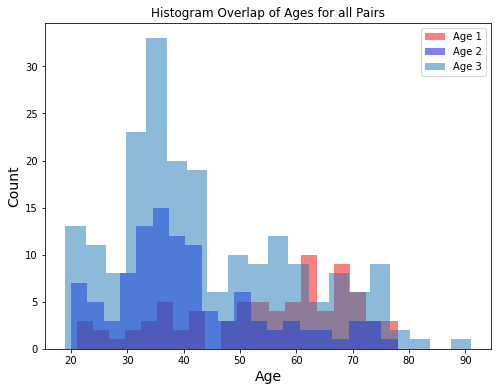

In [423]:
plt.figure(figsize=(8,6))
plt.hist(p1age, bins=20, alpha=0.5, label="Age 1", color='r')
plt.hist(p2age, bins=20, alpha=.5, label="Age 2", color='b')
plt.hist(p3age, bins=20, alpha=0.5, label="Age 3")
plt.xlabel("Age", size=14)
plt.ylabel("Count", size=14)
plt.title("Histogram Overlap of Ages for all Pairs")
plt.savefig('totalhistogram_ages.png', dpi=300, bbox_inches='tight')
plt.legend(loc='upper right')

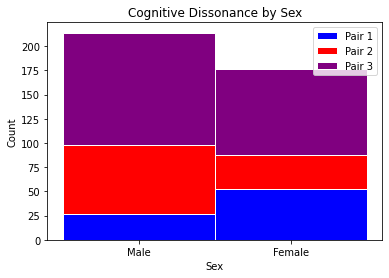

In [424]:
#Heights of bars1 + bars2
bars = np.add(sex1, sex2).tolist()
 
# The position of the bars on the x-axis
r = [0,1]
 
# Names of group and bar width
barWidth = 1
 
# Create brown bars
plt.bar(r, sex1, color='b', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, sex2, bottom=sex1, color='r', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, sex3, bottom=bars, color='purple', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, ['Male','Female'])
plt.xlabel("Sex")
plt.title('Cognitive Dissonance by Sex')
plt.ylabel("Count")
plt.legend(['Pair 1','Pair 2','Pair 3'],loc=1)
plt.savefig('Total_sex.png', dpi=300, bbox_inches='tight')
 
# Show graphic
plt.show()

# Stress

In [425]:
s1=usefuldata3['stress1'].tolist()
s2=usefuldata3['stress2'].tolist()

In [426]:
def stres(list):
    n=0
    s=0
    a=0
    for i in range (len(list)):
        if list[i]<3:
            a+=1
        elif list[i]==3:
            s+=1
        elif list[i]==4:
            n+=1
        elif list[i]==5:
            n+=1
        else:
            n=n
    return [a,s,n]
s1d=stres(s1)
s2d=stres(s2)
s1c=stres(stress1_list)
s2c=stres(stress4_list)
print(s1d)
print(s1c)

[46, 25, 41]
[476, 531, 574]


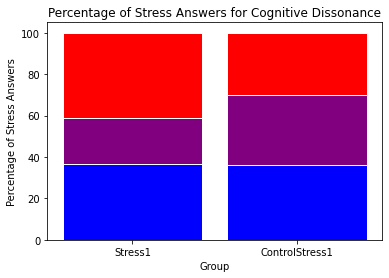

In [427]:
r = [0,1]
raw_data = {'Never': [41, 574], 'Sometimes': [25, 531],'Allthetime': [46, 476]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['Never'], df['Sometimes'], df['Allthetime'])]
never = [i / j * 100 for i,j in zip(df['Never'], totals)]
sometimes = [i / j * 100 for i,j in zip(df['Sometimes'], totals)]
att = [i / j * 100 for i,j in zip(df['Allthetime'], totals)]
 
# plot
barWidth = 0.85
names = ('Stress1','ControlStress1')
# Create green Bars
plt.bar(r, never, color='b', edgecolor='white', width=barWidth, label="group A")
# Create orange Bars
plt.bar(r, sometimes, bottom=never, color='purple', edgecolor='white', width=barWidth, label="group B")
# Create blue Bars
plt.bar(r, att, bottom=[i+j for i,j in zip(never, sometimes)], color='r', edgecolor='white', width=barWidth, label="group C")
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Group")
plt.ylabel('Percentage of Stress Answers')
plt.title('Percentage of Stress Answers for Cognitive Dissonance')
plt.savefig('Stress.png', dpi=300, bbox_inches='tight')
 
plt.show()

